# Breast Cancer Gene Expression Visualization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/tcga-xena-hub.s3.us-east-1.amazonaws.com_download_survival2FBRCA_survival.txt
/kaggle/input/breast-cancer/TCGA.BRCA.sampleMap_BRCA_clinicalMatrix
/kaggle/input/breast-cancer/TCGA.BRCA.sampleMap_HiSeqV2_percentile/HiSeqV2_percentile


# Data Credit...

Goldman, M.J., Craft, B., Hastie, M. et al. Visualizing and interpreting cancer genomics data via the Xena platform. Nat Biotechnol (2020). https://doi.org/10.1038/s41587-020-0546-8

cohort: TCGA Breast Cancer (BRCA)

https://xenabrowser.net/datapages/?cohort=TCGA%20Breast%20Cancer%20(BRCA)&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443

In [2]:
# load gene expression data
geneExpressionData = pd.read_csv('/kaggle/input/breast-cancer/TCGA.BRCA.sampleMap_HiSeqV2_percentile/HiSeqV2_percentile', sep='\t')

# transpose the gene dataset...
geneTranspose = geneExpressionData.set_index('sample')
geneTranspose = geneTranspose.transpose()
geneTranspose.reset_index(names='sampleID', inplace=True)

Text(0.5, 47.7222222222222, 'Gene')

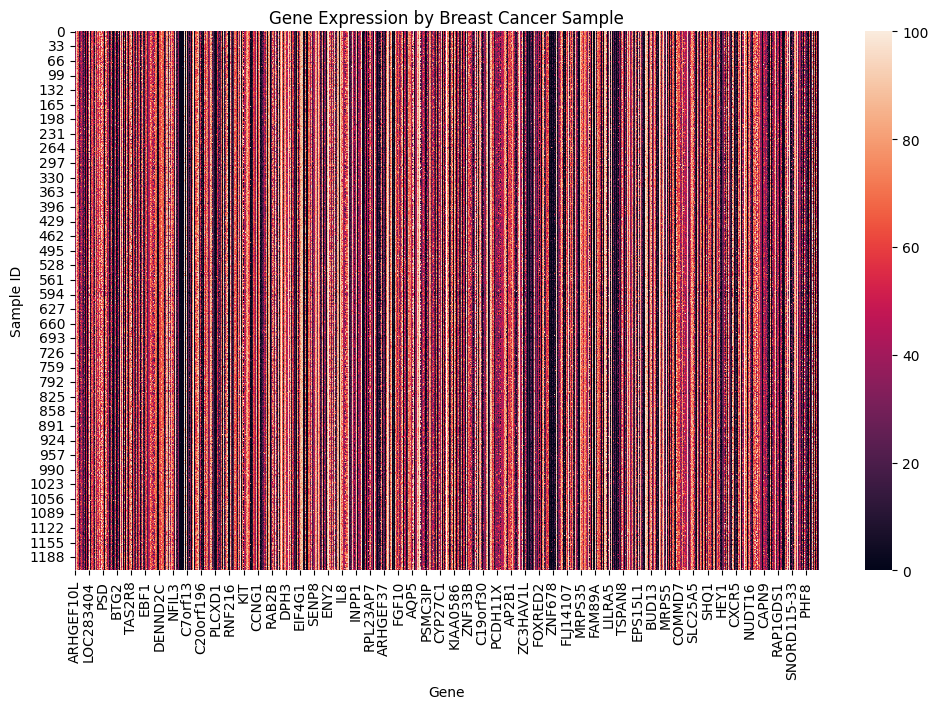

In [3]:
# heatmap of gene expression data
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_title('Gene Expression by Breast Cancer Sample')
sns.heatmap(geneTranspose.iloc[:, 1:])
plt.ylabel('Sample ID')
plt.xlabel('Gene')

Nice graph!  But what if we sort the genes by average percentile expression across all the samples...

Text(0.5, 47.7222222222222, 'Gene')

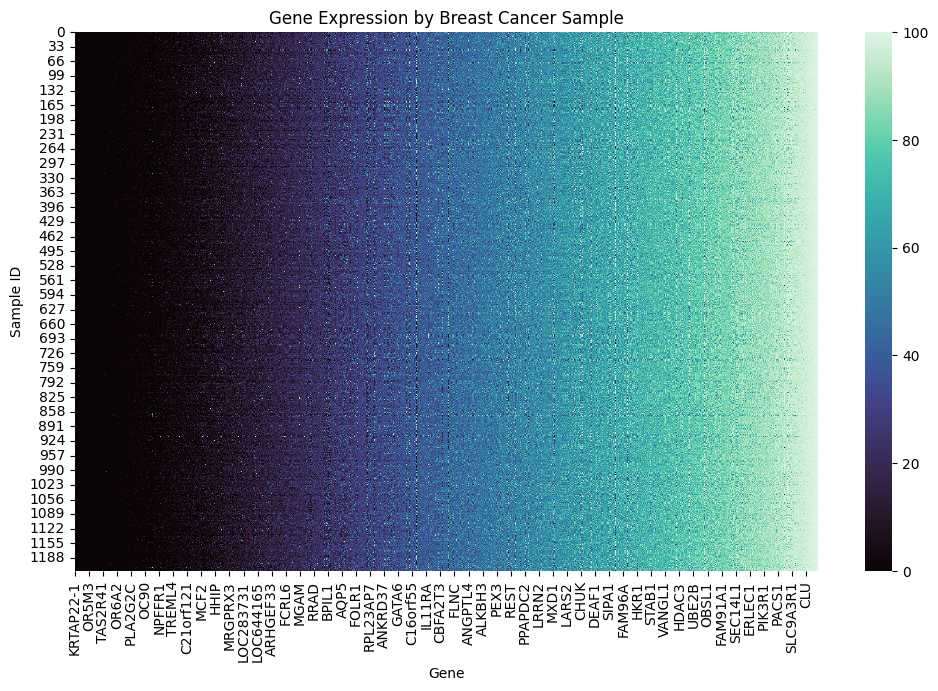

In [4]:
# sort the genes by mean percentile expression across all samples
geneAvgExpression = geneTranspose.iloc[:, 1:].mean(axis=0)
geneAvgExpression.sort_values()
geneByAvgExp = geneTranspose.reindex(geneTranspose.iloc[:, 1:].mean().sort_values().index, axis=1)

# plot the heatmap
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_title('Gene Expression by Breast Cancer Sample')
sns.color_palette("mako", as_cmap=True)
sns.heatmap(geneByAvgExp, cmap="mako")
plt.ylabel('Sample ID')
plt.xlabel('Gene')

Sweet!  Can't wait get get stuck in to the survival and clinical datasets next...